## Haberman's Survival Data Set Description : - 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Objective / Problem Statement

To Perform Exploratory Data Analysis (EDA) in order to predict whether a patient undergoing surgery for breast cancer survives for more than 5 years or not based on the three attributes i.e age , year of operation and the number of positive axillary nodes detected.

## Attribute Information:

Number of Instances: 306

Number of Attributes: 4 (including the class attribute i.e in our analysis the Survival rate )

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)

Survival_status_of_person (class attribute) 1 = the patient survived 5 years or longer 
                                            / 
                                            2 = the patient died within 5 year


In [3]:
# Imporitng the required libraries and packages as per below

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Naming the colomn feature/attributes as per below and assinging it to 'index' 

index = ['Age_of_the_person', 'Year_of_the_operation', 'No_of_Axillary_nodes_detected_in_total', 'Survival_status_of_person']

In [5]:
# Loading the data set into a pandas dataFrame and assinging it to 'HS'

HS = pd.read_csv('haberman.csv',names = index, header = 1 )


In [6]:
# Exploring the information about the dataset 

HS.info()
HS['Survival_status_of_person'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 4 columns):
Age_of_the_person                         304 non-null int64
Year_of_the_operation                     304 non-null int64
No_of_Axillary_nodes_detected_in_total    304 non-null int64
Survival_status_of_person                 304 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


1    223
2     81
Name: Survival_status_of_person, dtype: int64

In [7]:
# printing the first five rows of data set through head fun

HS.head()

,Age_of_the_person,Year_of_the_operation,No_of_Axillary_nodes_detected_in_total,Survival_status_of_person
0,30,65,0,1
1,31,59,2,1
2,31,65,4,1
3,33,58,10,1
4,33,60,0,1


-------------------------------------------------------------------------------------------

### Observations from above information

- Their are in total 304 entries(data points) ranging from 0 to 303


- There are 4 columns in total out of which 3 describing the datapoint atrributes and 1 for the output attribute


- The output attribute ('Survival_status_of_person') has only two values i.e Survived-1 and not survived-2 which ultimatley indicates that it is binary binary-classification problem


- Each column/atrribute has 306 non-null values in total (which are in int64 -integer format)
 
 
- Survival_status_of_person has only two class values 1 & 2 


- Through value count fun on Survival_status_of_person we can conclude that dataset is imbalanced as their 223 data points for the patient survived 5 years or longe and 81 datapoints for the patient died within 5 year 
- i.e 73.5% records belong to class 1 & Only 26.5% cases belong to class 2


- There are no missing values in dataset

In [22]:
# Geting the max,min,std,mean values of each attributes

HS.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age_of_the_person,304.0,52.605263,10.683356,30.0,44.0,52.0,61.00,83.0
Year_of_the_operation,304.0,62.851974,3.259077,58.0,60.0,63.0,66.00,69.0
No_of_Axillary_nodes_detected_in_total,304.0,4.039474,7.210994,0.0,0.0,1.0,4.25,52.0
Survival_status_of_person,304.0,1.266447,0.442830,1.0,1.0,1.0,2.00,2.0


### Univariate analysis 

#### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words the data has only one variable.


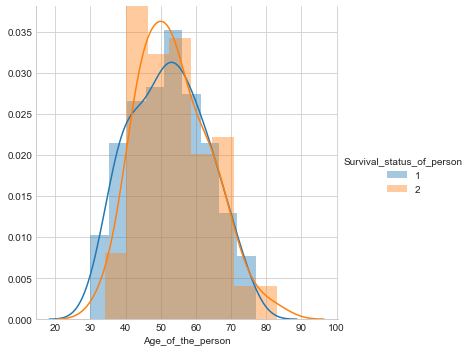

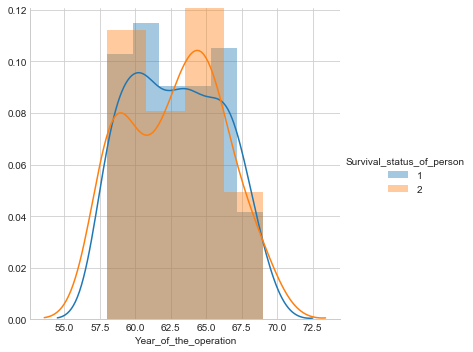

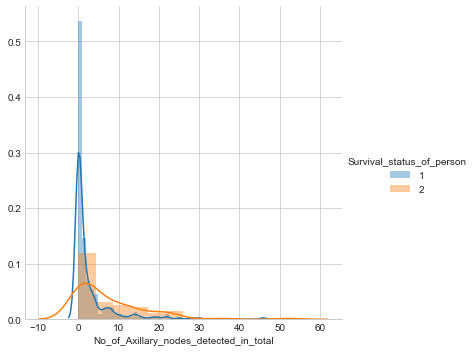

In [21]:
# Performing 1 D Analysis of dataset using Distribution plots

sns.FacetGrid(HS, hue="Survival_status_of_person", size=5).map(sns.distplot, "Age_of_the_person").add_legend();

sns.FacetGrid(HS, hue="Survival_status_of_person", size=5).map(sns.distplot, "Year_of_the_operation").add_legend();

sns.FacetGrid(HS, hue="Survival_status_of_person", size=5).map(sns.distplot, "No_of_Axillary_nodes_detected_in_total").add_legend();
plt.show();


#### Observations of 1 D Analysis

- Above grahps with attributes Age_of_the_person & Year_of_the_operation tend to overlap a alot due to which we are unable to make a sense out of data using those.

- The axillary nodes is the most important feature to predict the survival status after 5 years as their is less overlap of graphs. Roughly the survival rate is extremely high for patients having less than 3 axillary nodes.

In [10]:
Survived=HS.loc[HS['Survival_status_of_person']==1]
Not_Survived=HS.loc[HS['Survival_status_of_person']==2]

[0.04484305 0.10762332 0.12556054 0.0941704  0.16591928 0.16591928
 0.0941704  0.11210762 0.06278027 0.02690583]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


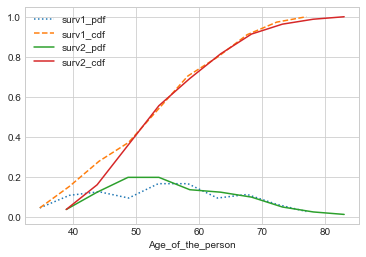

[0.18834081 0.10762332 0.10313901 0.06726457 0.09865471 0.09865471
 0.06726457 0.09865471 0.0941704  0.07623318]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


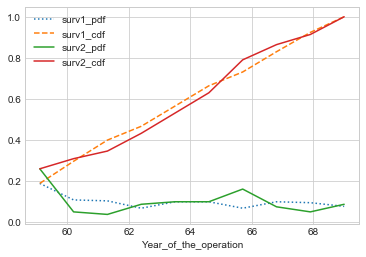

[0.83408072 0.08071749 0.02242152 0.02690583 0.01793722 0.0044843
 0.00896861 0.         0.         0.0044843 ]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


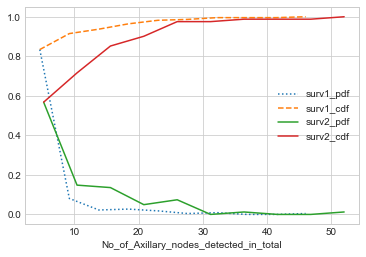

In [20]:
# Performing 1 D Analysis of dataset using CDF

for i in ["Age_of_the_person","Year_of_the_operation","No_of_Axillary_nodes_detected_in_total"]:
    counts, bin_edges = np.histogram(Survived[i], bins=10,density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,ls='dotted',label='surv1_pdf')
    plt.plot(bin_edges[1:], cdf,ls='--',label='surv1_cdf')
    plt.xlabel(i)
    plt.legend()
    
    counts, bin_edges = np.histogram(Not_Survived[i], bins=10,density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='surv2_pdf')
    plt.plot(bin_edges[1:], cdf,label='surv2_cdf')
    plt.xlabel(i)
    plt.legend()
    plt.show();

#### From the above CDF plots we can observe that 

- The Person with high number of axillary nodes have less probablity of surviving

- Maximum no of persons who survived have less than 3 axillary nodes.

- For the classification of survival status of person , Year_of_the_operation is the least important attribute


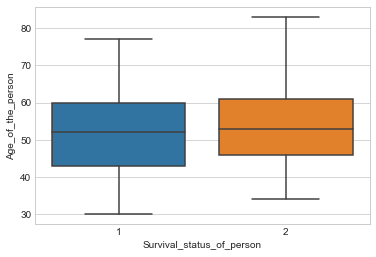

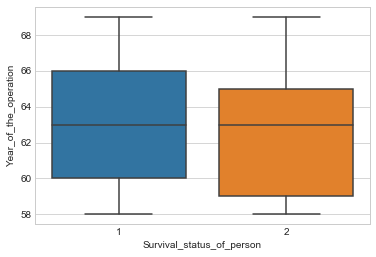

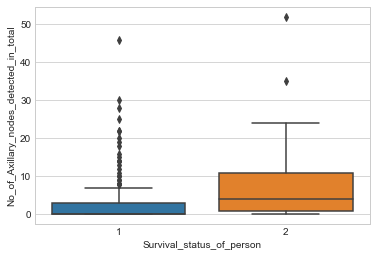

In [23]:
# Performing Analysis of dataset using BOX plot

sns.boxplot(x='Survival_status_of_person',y='Age_of_the_person', data=HS)
plt.show()

sns.boxplot(x='Survival_status_of_person',y='Year_of_the_operation', data=HS)
plt.show()

sns.boxplot(x='Survival_status_of_person',y='No_of_Axillary_nodes_detected_in_total', data=HS)
plt.show()


### Bi-variate analysis using pair-plots :

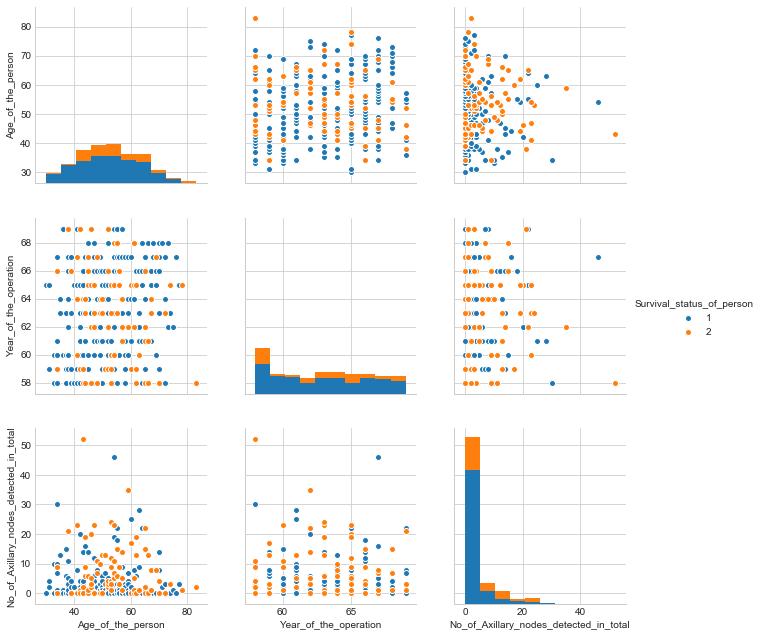

In [18]:
# Performing Analysis of dataset using Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(HS, hue='Survival_status_of_person', size=3 ,vars=['Age_of_the_person','Year_of_the_operation','No_of_Axillary_nodes_detected_in_total']);
plt.show()

### Conclusion through observations

- No of person who posess high no of axillary nodes indicates that they have high probablity of Not surviving. 


- Axillary nodes is most important feature/attribute to predict the survival status of person.


- The person with 0 axillary node is most likely to be survive.


- The least usefull attribute to predict the survival status of person is 'year of operation'


- Most of the persons who performed surgery were between 42-60 years of age


- The majority of the surgeries were performed between 1960 - 1966.

